# 待ち行列理論
窓口の行列を確率的に表現する．
ここでは一つの窓口に来ることを考慮する．

## 利用者が到着するモデル
人がランダムに来るとする．
ポワソン過程を用いる．
1時間あたりに$\lambda$人来るとすると，
微小時間$\Delta t$の間には確率$\lambda \Delta t$で来ることになる

## 所要時間をモデル化
サービスが終了する速さを$\mu$とすると，先頭にいる人は確率$\mu \Delta t$でいなくなる．
$\mu$は指数分布に従う

## 出生死滅過程
これを合わせて出生死滅過程という．
これらをまとめると

## 行列の長さを確率的捉える
ある時刻$t$において，行列が$n$人である確率を$P_n(t)$とすると，漸化式を立てることが出来る．
$$
P_{n}(t+\Delta t) = \lambda P_{n-1}(t)\Delta t + (1 - \lambda \Delta t + \mu \Delta t)P_{n}(t) + \mu P_{n+1}(t)\Delta t
$$
$P_n(t)$を移項して両辺を$\Delta t$で割ると微分方程式の形になる．

注意として，$n=0$の時は別に考えないといけないが，ここでは面倒なため書いていない，


ここで定常状態(状態確率が時間的に変化しない常態)について考えると，
$$
0 = \lambda P_{n-1} - (\lambda + \mu)P_n + \mu P_{n+1}
$$
となり，三項漸化式および無限等比級数を解くと，

$$
P_n = (1-\rho)\rho ^n
$$
となる．ただし，$\rho = \lambda / \mu$である．

文字をまとめると
$$
\lambda: 平均到着率 \\
\mu: 平均サービス率 \\ 
\rho: 平均稼働率
$$

## システム内人数の期待値
平均で何人分待つか
$$
\begin{align}
E[n] &= \sum_{n=0}^{\infty}p(n)n \\
     &= \sum_{n=0}^{\infty}(1-\rho)\rho ^n n \\
     &= (1-\rho) \cdot \dfrac{\rho}{(1-\rho)^2} \\
     &= \dfrac{\rho}{1-\rho}
\end{align}
$$

## システム内時間の期待値
並び始めてサービスを終えるまでに平均でどれくらい時間がかかるのか

まずは平均待ち時間$E[st]$を求める．
平均サービス時間は$1/\mu$で求められるので，
$$
\begin{aligned}
E[st] &= E[n]*(1/\mu) \\
     &= \dfrac{\lambda}{\mu(\mu-\lambda)}
\end{aligned}
$$
よって，人を待ってから自分のサービスが終わるまでの時間の期待値$E[t]$は
$$
\begin{aligned}
E[t] &= E[st] + 1/\mu \\
     &= \dfrac{1}{\mu - \lambda}
\end{aligned}
$$

In [5]:
# Pythonを用いた実装
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 平均システム内人数
def expection_people(rho):
    return (rho)/(1-rho)

In [27]:
cnt = 50
rho = [i/50 for i in range(0, 50, 1)]
mean_people = [expection_people(i) for i in rho]

In [28]:
mean_people[-1]

48.99999999999996

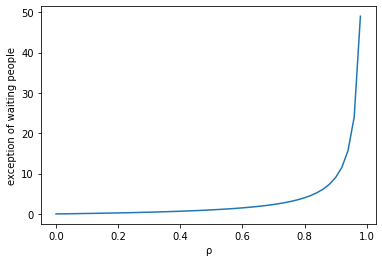

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel('ρ')
ax.set_ylabel('exception of waiting people')
ax.plot(rho, mean_people)
plt.show()

In [34]:
# 平均システム内時間
def mean_system(mu, la):
    if mu <= la:
        return 0
    return 1/(mu - la)

In [35]:
# 平均システム内時間 
L = [5, 10, 20, 45]
M = list(range(0, 61, 1))

mean_system5 = [mean_system(mu, la=5) for mu in M]
mean_system10 = [mean_system(mu, la=10) for mu in M]
mean_system20 = [mean_system(mu, la=20) for mu in M]
mean_system45 = [mean_system(mu, la=45) for mu in M]

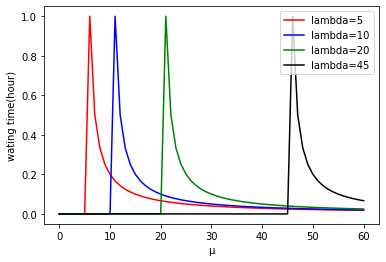

In [38]:
# グラフ
fig, ax = plt.subplots()
labels = ['lambda=5', 'lambda=10', 'lambda=20', 'lambda=45']
colors = ['red', 'blue', 'green', 'black']

ax.set_xlabel('µ')
ax.set_ylabel('wating time(hour)')

ax.plot(M, mean_system5, color = colors[0], label=labels[0])
ax.plot(M, mean_system10, color = colors[1], label=labels[1])
ax.plot(M, mean_system20, color = colors[2], label=labels[2])
ax.plot(M, mean_system45, color = colors[3], label=labels[3])
ax.legend()
plt.show()